##Assignment 6

### Primary finding: the crime categories drug/narcotic and vehicule theft have the highest variation per police district. The Tenderloin district is a hot spot for drug/narcotic incidents.

Load the data

In [50]:
file = open('sanfrancisco_incidents_summer_2014.csv','r')
data = [x.replace('\n','').split(',') for x in file]
header = data[0]
data = data[1:]
district = 6
category = 1

For each district determine what the relative occurence is for each category. Note that categories which contribute less than 2% to the total number of incidents are ignored in this analysis.

In [51]:
catPerDistrict = {} # {district:{category:incidents}}
districtPerCat = {} # {category:{district:incidents}}
districtTotals = {} # {district:incidents}
categoryTotals = {} # {category:incidents}
catPerDistrictRelative = {}  # {district:{category:incidents/totalDistrict}}
# for each record
for d in data:
    # check if the district is already in the catPerDistrict dictionary
    distr = catPerDistrict.get(d[district],0)
    if distr == 0:
        # if not, add it with as value a dictionary containng the category of that record as key and 1 as value
        catPerDistrict[d[district]] = {d[category]:1}
    else:
        # if so, increase the category count of that record in the dictionary of the district
        cat = distr.get(d[category],0)
        distr[d[category]] = cat + 1
    # check if the category is already in the districtPerCat dictionary
    cat = districtPerCat.get(d[category],0)
    if cat == 0:
        # if not, add it with as value a dictionary containng the district of that record as key and 1 as value
        districtPerCat[d[category]] = {d[district]:1}
    else:
        # if so, increase the district count of that record in the dictionary of the category
        distr = cat.get(d[district],0)
        cat[d[district]] = distr + 1
    # check if the district is already in the districtTotals dictionary and increase the count by 1
    value = districtTotals.get(d[district],0)
    districtTotals[d[district]] = value + 1
    # check if the category is already in the categoryTotals dictionary and increase the count by 1
    value = categoryTotals.get(d[category],0)
    categoryTotals[d[category]] = value + 1
totalIncidents = sum(categoryTotals.values())
# only consider categories which make up at least 2 % of the total
filterIncidents = totalIncidents * 2 / 100.0
for distr in catPerDistrict:
    distrT = districtTotals[distr]
    catPerDistrictRelative[distr] = {}
    for cat in catPerDistrict[distr]:
        if categoryTotals[cat] >= filterIncidents:
            catPerDistrictRelative[distr][cat] = 100.0*catPerDistrict[distr][cat]/(1.0 * distrT)
catRelativeAvg = {cat:100.0*categoryTotals[cat]/totalIncidents for cat in categoryTotals if categoryTotals[cat] >= filterIncidents}
catPerDistrictRatio = {distr:{cat:catPerDistrictRelative[distr][cat]/catRelativeAvg[cat]  for cat in catPerDistrictRelative[distr]} for distr in catPerDistrictRelative}
catRatioList = {cat:[] for cat in catRelativeAvg}
for distr in catPerDistrictRatio:
    for cat in catPerDistrictRatio[distr]:
        catRatioList[cat].append(catPerDistrictRatio[distr][cat])
#print catRatioList
catRatioMin =  {cat:min(catRatioList[cat]) for cat in catRatioList}
catRatioMax =  {cat:max(catRatioList[cat]) for cat in catRatioList}

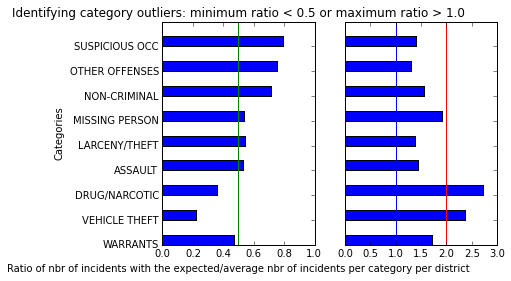

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)
width = 0.4
ind = np.arange(len(catRatioMin))
p0 = axes[0].set_title('Identifying category outliers: minimum ratio < 0.5 or maximum ratio > 1.0')
p1 = axes[0].set_ylabel('Categories')
p2 = axes[0].set_xlabel('Ratio of nbr of incidents with the expected/average nbr of incidents per category per district')
p3 = axes[0].barh(ind, catRatioMin.values(), width)
p4 = axes[1].barh(ind, catRatioMax.values(), width)
p5 = axes[0].plot([0.5,0.5],[0,9], color="green")
p6 = axes[0].plot([1,1],[0,9])
p7 = axes[1].plot([1,1],[0,9])
p8 = axes[1].plot([2,2],[0,9],color="red")
p9 = axes[0].set_yticklabels(catRatioMin.keys())
p10 = axes[1].set_yticklabels(['' for x in catRatioMin.keys()])

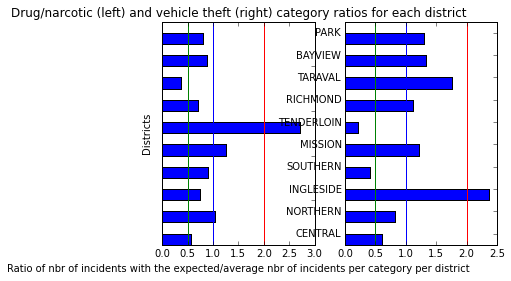

In [53]:
catPerDistrictRatio = {distr:{cat:catPerDistrictRelative[distr][cat]/catRelativeAvg[cat]  for cat in catPerDistrictRelative[distr]} for distr in catPerDistrictRelative}
drugRatio = {distr:catPerDistrictRatio[distr]["DRUG/NARCOTIC"] for distr in catPerDistrictRatio}
theftRatio = {distr:catPerDistrictRatio[distr]["VEHICLE THEFT"] for distr in catPerDistrictRatio}

fig2, axes2 = plt.subplots(nrows=1, ncols=2)
width2 = 0.5
ind2 = np.arange(len(theftRatio))
plt.yticks(ind2 + 0.5, drugRatio.keys())
p02 = axes2[0].set_title('Drug/narcotic (left) and vehicle theft (right) category ratios for each district')
p12 = axes2[0].set_ylabel('Districts')
p22 = axes2[0].set_xlabel('Ratio of nbr of incidents with the expected/average nbr of incidents per category per district')
p32 = axes2[0].barh(ind2, drugRatio.values(), width2)
p42 = axes2[1].barh(ind2, theftRatio.values(), width2)
p52 = axes2[0].plot([0.5,0.5],[0,10],color="green")
p62 = axes2[0].plot([1,1],[0,10])
p72 = axes2[0].plot([2,2],[0,10],color="red")
p82 = axes2[1].plot([0.5,0.5],[0,10],color="green")
p92 = axes2[1].plot([1,1],[0,10])
p102 = axes2[1].plot([2,2],[0,10],color="red")
p122 = axes2[0].set_yticklabels(['' for x in theftRatio.keys()])


####In the Tenderloin district the drug/narcotic incidents happen significantly more frequent. The Tenderloin district appears to be a hot spot for drug/narcotic incidents. In the Taraval district these incident are significantly less frequent.
####In the Ingleside district the vehicle theft incidents happen significantly more frequent but there are other districts with a higher frequency. In the Tenderloin and Southern district these happen significantly less frequent.